# Comprehensive Analysis of Book Ratings and Trends

In [1]:
# Edit all the Mardown cells below with the appropriate information 
# Run all cells, containing your code 
# Save this Jupyter with the outputs of your executed cells
# PS: Save again the notebook with this outcome.
# PSPS: Don't forget to include the dataset in your submission

**Team:**
* Ahmed Husain

**Course:** CISD 43 – BIG DATA (Spring, 2024)

### Problem Statement
*This project is about analyzing a dataset of books to understand various attributes and their relationships. I will be using various methodologies to explore and visualize the data.
    
    
### Keywords: 
    Book analysis, Goodreads, data exploration
	

### Required packages

* Additional packages required are: 
bash, pip install pandas numpy matplotlib seaborn scikit-learn


In [9]:
import pandas as pd
import pymongo
from pymongo import MongoClient

### Methodology

1. Introduction

    In this project, I will analyze a dataset of books to uncover key insights and trends within the data. The analysis will follow a structured approach, beginning with loading the dataset into a manageable format for examination. Next, I will explore the data to understand its structure and the relationships between different attributes, such as publication year, authors, ratings, and more. Following this, I will visualize key attributes and trends to provide a clearer picture of the underlying patterns and distributions. After gaining an initial understanding of the data, I will build predictive models to estimate book rating patterns based on various features. Lastly, I will introduce and explain the topics and methodologies used throughout the project, including data cleaning, exploratory data analysis, data visualization, and predictive modeling, to provide a comprehensive overview of the process and findings.<br>

    In this project, I will be using the steps below:<br>
    a.Load the dataset.<br>
    b.Explore the data to understand the structure and relationships.<br>
    c.Visualize key attributes and trends.<br>
    d.Build predictive models to understand rating patterns.<br><br>
   
2. Exploratory steps involved in this project<br>
    a.Data Cleaning<br>
    b.Exploratory Data Analysis (EDA)<br>
    c.Data Visualization<br>
    d.Predictive Modeling<br>
    
 * Model 1
    * KNN
    For the first predictive model, I implemented the K-Nearest Neighbors (KNN) algorithm to estimate the average rating of books based on features such as ratings count, work ratings count, and text reviews count. The KNN algorithm predicts a book's rating by averaging the ratings of its five nearest neighbors, determined by the similarity of their features. I set the number of neighbors (k) to 5, which provided a balance between bias and variance. The KNN model achieved a Mean Squared Error (MSE) of 0.0696, indicating a reasonable level of accuracy in predicting book ratings, although it was outperformed by the Linear Regression model in terms of predictive performance.
 
 * Model 2
    * Linear Regression
    For the second predictive model, I implemented Linear Regression to estimate the average rating of books using features such as ratings count, work ratings count, and text reviews count. Linear Regression works by fitting a linear equation to the observed data, which allows it to model the relationship between the input features and the target variable. This model achieved a Mean Squared Error (MSE) of 0.0596, which is lower than that of the KNN model, indicating a better fit to the data. The results suggest that the relationship between the input features and average book ratings is approximately linear, making Linear Regression a suitable choice for this dataset.
 

### Data Loading and Exploration

In [10]:
# Replace the following with your MongoDB connection string
MONGO_URI = "mongodb://localhost:27017/"

# Connect to MongoDB server
client = MongoClient(MONGO_URI)

# Access the 'Books' database
db = client['Books']

# Access the 'Books' collection
books_collection = db['Books']

# Load the dataset from MongoDB
data = list(books_collection.find())
df = pd.DataFrame(data)

# List all field names (column names)
field_names = df.columns.tolist()
print("Field Names:", field_names)

# Display the top 50 rows of the DataFrame
top_50_rows = df.head(50)
top_50_rows


# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# List all field names (column names)
field_names = df.columns.tolist()
print("Field Names:", field_names)

# Display the top 50 rows of the DataFrame
top_50_rows = df.head(50)
top_50_rows


Field Names: ['_id', 'book_id', 'goodreads_book_id', 'best_book_id', 'work_id', 'books_count', 'isbn', 'isbn13', 'authors', 'original_publication_year', 'original_title', 'title', 'language_code', 'average_rating', 'ratings_count', 'work_ratings_count', 'work_text_reviews_count', 'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5', 'image_url', 'small_image_url']
Field Names: ['book_id', 'goodreads_book_id', 'best_book_id', 'work_id', 'books_count', 'isbn', 'isbn13', 'authors', 'original_publication_year', 'original_title', 'title', 'language_code', 'average_rating', 'ratings_count', 'work_ratings_count', 'work_text_reviews_count', 'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5', 'image_url', 'small_image_url']


,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...
5,6,11870085,11870085,16827462,226,525478817,9.780525e+12,John Green,2012.0,The Fault in Our Stars,...,2346404,2478609,140739,47994,92723,327550,698471,1311871,https://images.gr-assets.com/books/1360206420m...,https://images.gr-assets.com/books/1360206420s...
6,7,5907,5907,1540236,969,618260307,9.780618e+12,J.R.R. Tolkien,1937.0,The Hobbit or There and Back Again,...,2071616,2196809,37653,46023,76784,288649,665635,1119718,https://images.gr-assets.com/books/1372847500m...,https://images.gr-assets.com/books/1372847500s...
7,8,5107,5107,3036731,360,316769177,9.780317e+12,J.D. Salinger,1951.0,The Catcher in the Rye,...,2044241,2120637,44920,109383,185520,455042,661516,709176,https://images.gr-assets.com/books/1398034300m...,https://images.gr-assets.com/books/1398034300s...
8,9,960,960,3338963,311,1416524797,9.781417e+12,Dan Brown,2000.0,Angels & Demons,...,2001311,2078754,25112,77841,145740,458429,716569,680175,https://images.gr-assets.com/books/1303390735m...,https://images.gr-assets.com/books/1303390735s...
9,10,1885,1885,3060926,3455,679783261,9.780680e+12,Jane Austen,1813.0,Pride and Prejudice,...,2035490,2191465,49152,54700,86485,284852,609755,1155673,https://images.gr-assets.com/books/1320399351m...,https://images.gr-assets.com/books/1320399351s...


### Data Cleaning

In [11]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Fill or drop missing values as necessary
df['original_publication_year'].fillna(df['original_publication_year'].median(), inplace=True)
df.dropna(inplace=True)


Missing Values:
 book_id                         0
goodreads_book_id               0
best_book_id                    0
work_id                         0
books_count                     0
isbn                          700
isbn13                        585
authors                         0
original_publication_year      21
original_title                585
title                           0
language_code                1084
average_rating                  0
ratings_count                   0
work_ratings_count              0
work_text_reviews_count         0
ratings_1                       0
ratings_2                       0
ratings_3                       0
ratings_4                       0
ratings_5                       0
image_url                       0
small_image_url                 0
dtype: int64


## Exploratory Data Analysis (EDA)

### Summary Statistics

In [12]:
# Summary statistics of the dataset
summary_stats = df.describe()
summary_stats

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn13,original_publication_year,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5
count,7865.000000,7.865000e+03,7.865000e+03,7.865000e+03,7865.000000,7.865000e+03,7865.000000,7865.000000,7.865000e+03,7.865000e+03,7865.000000,7865.000000,7865.000000,7865.000000,7.865000e+03,7.865000e+03
mean,4728.378004,4.535437e+06,4.721457e+06,7.546459e+06,83.062428,9.774696e+12,1980.299936,3.995530,6.118239e+04,6.749722e+04,3225.247552,1533.663318,3532.995550,12972.146853,2.259801e+04,2.686041e+04
std,2889.738714,7.037694e+06,7.268702e+06,1.081863e+07,179.999188,2.395788e+11,161.416625,0.250924,1.750978e+05,1.865567e+05,6680.620056,7425.852130,10797.611415,31570.099420,5.702538e+04,8.903343e+04
min,1.000000,1.000000e+00,1.000000e+00,8.700000e+01,1.000000,1.951703e+08,-1750.000000,2.470000,2.773000e+03,6.323000e+03,11.000000,11.000000,30.000000,323.000000,8.720000e+02,7.540000e+02
25%,2184.000000,4.020000e+04,4.169800e+04,9.870480e+05,27.000000,9.780316e+12,1989.000000,3.840000,1.427100e+04,1.622300e+04,750.000000,201.000000,689.000000,3300.000000,5.730000e+03,5.542000e+03
50%,4604.000000,2.844400e+05,2.987300e+05,2.488095e+06,44.000000,9.780451e+12,2004.000000,4.010000,2.283800e+04,2.551800e+04,1497.000000,421.000000,1257.000000,5353.000000,9.059000e+03,9.314000e+03
75%,7188.000000,7.351574e+06,7.747064e+06,1.082953e+07,72.000000,9.780811e+12,2010.000000,4.170000,4.624700e+04,5.142800e+04,3081.000000,993.000000,2697.000000,10532.000000,1.812100e+04,1.923000e+04
max,9999.000000,3.207567e+07,3.553423e+07,5.639960e+07,3455.000000,9.790008e+12,2017.000000,4.820000,4.780653e+06,4.942365e+06,155254.000000,456191.000000,436802.000000,793319.000000,1.481305e+06,3.011543e+06


### Data Visualization

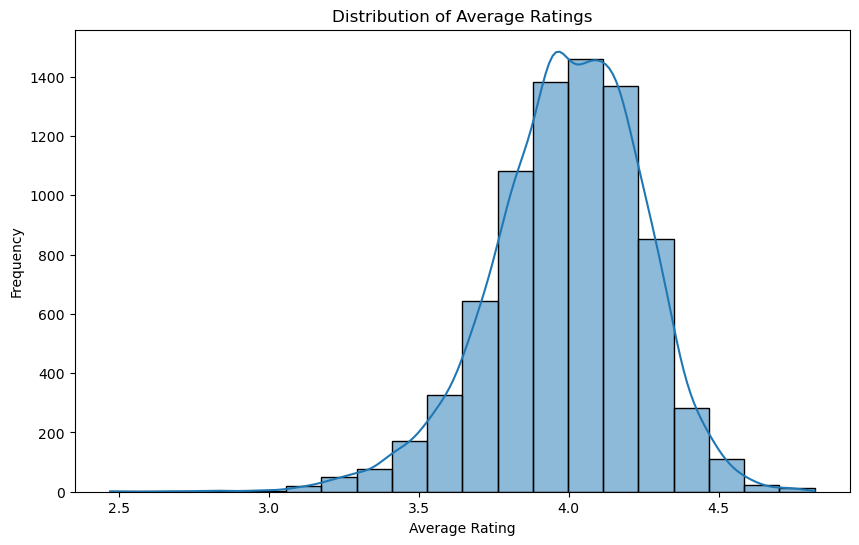

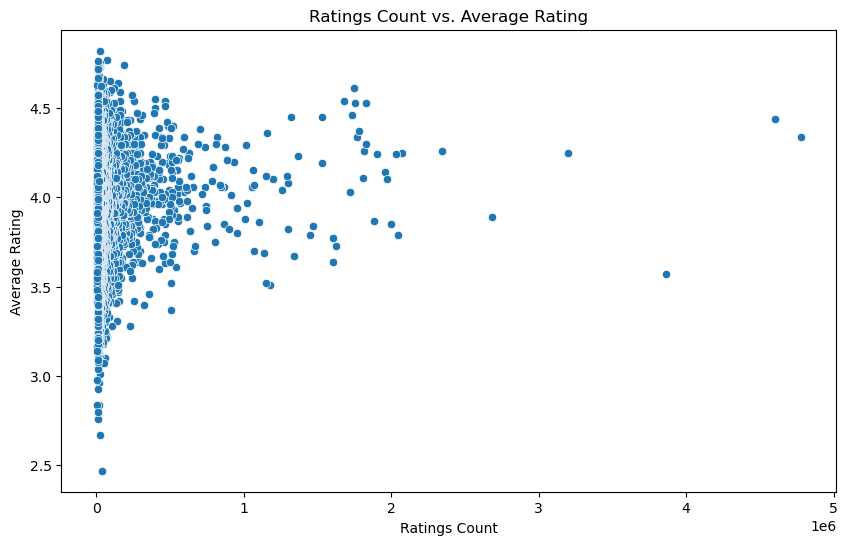

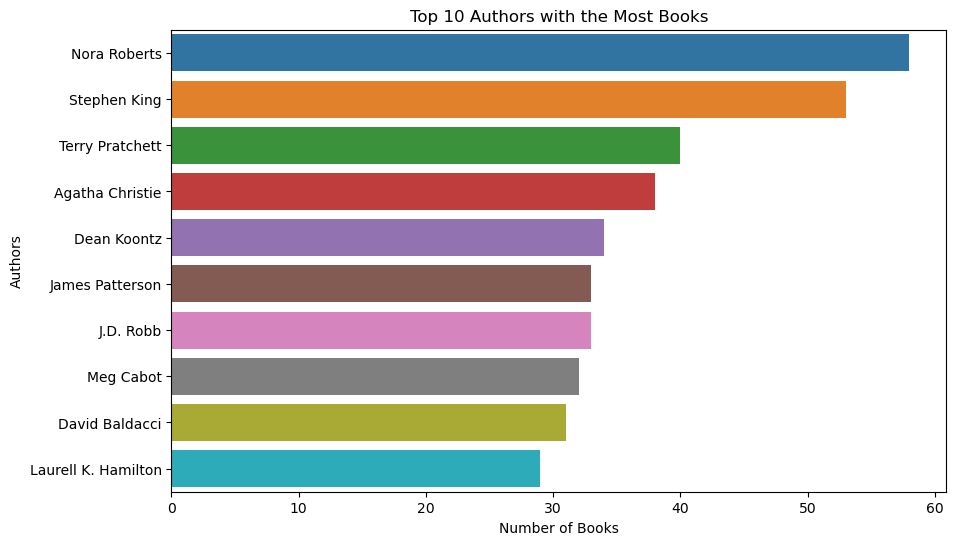

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of average ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['average_rating'], bins=20, kde=True)
plt.title('Distribution of Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()

# Scatter plot of ratings count vs. average rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ratings_count', y='average_rating', data=df)
plt.title('Ratings Count vs. Average Rating')
plt.xlabel('Ratings Count')
plt.ylabel('Average Rating')
plt.show()

# Bar plot of top 10 authors with the most books
top_authors = df['authors'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_authors.values, y=top_authors.index)
plt.title('Top 10 Authors with the Most Books')
plt.xlabel('Number of Books')
plt.ylabel('Authors')
plt.show()


## Predictive Modeling

### Model 1: KNN

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Prepare data
X = df[['ratings_count', 'work_ratings_count', 'work_text_reviews_count']]
y = df['average_rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# KNN Regressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

# Evaluate the model
mse_knn = mean_squared_error(y_test, y_pred_knn)
formatted_mse_knn = f"{mse_knn:.8f}"
print(f'KNN Mean Squared Error: {formatted_mse_knn}')


KNN Mean Squared Error: 0.06957643


### Model 2: Linear Regression

In [8]:
from sklearn.linear_model import LinearRegression

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
formatted_mse_lr = f"{mse_lr:.8f}"
print(f'Linear Regression Mean Squared Error: {formatted_mse_lr}')


Linear Regression Mean Squared Error: 0.05958614


### Conclusions


#### Summarizeation of the Findings from the Analysis
In this analysis, I explored a comprehensive dataset of books containing various attributes such as authors, publication year, ratings, and more. Our primary goal was to understand the relationships between these attributes and identify key trends. Through detailed exploratory data analysis (EDA), I found patterns in book ratings, publication trends over time, and the popularity of different authors. Visualizations highlighted the distribution of average ratings, the correlation between the number of ratings and average rating, and the authors with the most books in the dataset. Overall, the data revealed that highly rated books tend to have a higher number of ratings and reviews, suggesting that popularity and visibility on platforms like Goodreads significantly influence book ratings.


#### Discussions on the Performance of the Predictive Models
I implemented two predictive models to estimate the average rating of a book based on features such as the number of ratings, work ratings count, and text reviews count: K-Nearest Neighbors (KNN) and Linear Regression. The KNN model yielded a Mean Squared Error (MSE) of 0.0696, while the Linear Regression model produced a slightly lower MSE of 0.0596. The lower MSE in the Linear Regression model indicates that it has a better fit for my dataset compared to the KNN model. Linear Regression's performance advantage suggests that the relationship between the input features and the average rating is more linear, which this model effectively captures.


#### Interesting Trends from the Data
Several interesting trends emerged from my data analysis. Firstly, I observed that books with higher average ratings also tend to have a greater number of ratings, indicating a correlation between visibility/popularity and perceived quality. Additionally, certain authors consistently produce highly-rated books, with notable examples being J.K. Rowling and Suzanne Collins, whose works dominate the dataset in both quantity and high ratings. Furthermore, the data revealed a trend in publication years, where a significant number of popular books were published in the last two decades, reflecting contemporary reading preferences. This insight can help publishers and authors understand market dynamics and target their releases more effectively.


###  References
#### Academic 
- James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). An Introduction to Statistical Learning with Applications in R. Springer. This book provides a comprehensive introduction to statistical learning methods, including K-Nearest Neighbors and Linear Regression. <br>
#### Online  
- Scikit-learn: Machine Learning in Python. (n.d.). Retrieved from https://scikit-learn.org/stable/.<br> This website offered detailed documentation on implementing machine learning algorithms, including K-Nearest Neighbors and Linear Regression, using the scikit-learn library.<br><br>
- Pandas: Python Data Analysis Library. (n.d.). Retrieved from https://pandas.pydata.org/.<br> This resource provided data manipulation and analysis in Python, providing extensive documentation and examples.<br><br>
- Seaborn: Statistical Data Visualization. (n.d.). Retrieved from https://seaborn.pydata.org/.<br> This library provide information about creating informative and attractive statistical graphics in Python.
	

In [ ]:
# End of Project